In [1]:
import pandas as pd
import numpy as np

datasets = pd.read_csv("train.csv")
datasets.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
datasets = datasets.values
datasets

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

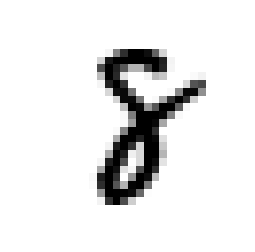

In [13]:
some_digits = datasets[300][1:]
some_digits_image = some_digits.reshape(28, 28)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(some_digits_image, cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [23]:
y_train = datasets[:,0]
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [25]:
X_train = datasets[:,1:]
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn
model = SGDClassifier(random_state=42)


In [30]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state = 42)


In [31]:
model.fit(X_train, y_train)


/home/nimals/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [32]:
testsets = pd.read_csv("test.csv")
testsets = testsets.values
testsets

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
res = model.predict(testsets)
res

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
res = pd.DataFrame(res)
res.columns = ['Label']
res.index += 1
res.index.rename("ImageId")
res.to_csv("res.csv")

In [36]:
res.head()

,Label
1,2
2,0
3,9
4,2
5,2


In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
res = RFC.predict(testsets)
res = pd.DataFrame(res)
res.columns = ['Label']
res.index += 1
res.index.rename("ImageId")
res.to_csv("res2.csv")
res

,Label
1,2
2,0
3,9
4,2
5,8
6,7
7,0
8,3
9,0
10,3
